A lot of interesting things were discovered when I read this example, which shows why the mean has been giving me such "blah" shapes

https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv


This article is a critical component that shows the fault of what we tried before.
https://www.tdcommons.org/cgi/viewcontent.cgi?article=1713&context=dpubs_series

1. Transform the image into a perceptual color space
2. Bucket the colors (i.e. round the decimals ? )
3. Cluster (DBSCAN?)
4. Score, aggregate, extract what is dominant

This is my latest plan
http://rstudio-pubs-static.s3.amazonaws.com/155921_d1b0d531118d46839a747b7c8b90e08b.html


In [15]:
import cv2
import os
import glob
import numpy as np
from skimage import io
from IPython.display import Image, display
from colormath.color_objects import LuvColor
from colormath.color_diff import delta_e_cie2000
import matplotlib.pyplot as plt

In [63]:
clistfile = 'color_list.csv'
# change this
pic_file = 'lego.png'
pic_file = 'sunset_painting.jpeg'

#dont need to change these
repo_path = os.path.dirname(os.getcwd())
img_path = '/img'
testfile = repo_path + img_path + '/' + pic_file

In [64]:
# this is a helper function to show the color

def show_color(conv):
    a = np.ones(shape=(100,100,3), dtype=np.uint8)*np.uint8(conv)
    plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
    plt.show()

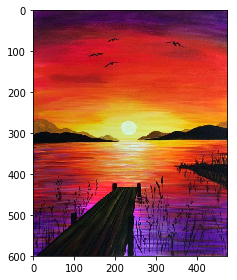

In [65]:
testfile
io.imshow(testfile)

In [110]:
import cv2

def extract_dominant(pic, clusters):
    
    # this will not be necessary if pic is passed directly
    pic_in = cv2.imread(pic,1)
    
    # normalize array to 0-1 instead of 0-255
    pic_norm = np.array(pic_in).astype('float32')/255
    
    # convert to LAB
    pic_lab = cv2.cvtColor(pic_norm, cv2.COLOR_BGR2LAB)
    
    # reshape - make it long and 2D
    pic_reshape = np.float32(pic_lab.reshape(-1,3))
    
    # cluster
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5000, 5)
    flags = cv2.KMEANS_PP_CENTERS

    _, labels, palette = cv2.kmeans(pic_reshape, clusters, None, criteria, 30, flags)
    _, counts = np.unique(labels, return_counts=True)

    # most dominant cluster
    biggest_cluster = palette[np.argmax(counts)]
    
    # reshape to 3 channels
    biggest_cluster = np.float32(biggest_cluster.reshape(1,1,3))

    # convert back to BGR
    biggest_cluster = cv2.cvtColor(biggest_cluster, cv2.COLOR_LAB2BGR)
    
    # de-normalize back to bits
    biggest_cluster *= [255,255,255]
    
    return np.rint(biggest_cluster)
    

In [111]:
extract_dominant(testfile,4)

array([[[ 38.,  56., 202.]]], dtype=float32)

In [66]:
# cv2 imports as BGR
pic_in = cv2.imread(testfile,1)

# have to normalize array to 0-1 instead of 0-255
# because the next cv2 function expects it
pic_norm = np.array(pic_in).astype('float32')/255

# BGR to LUV (http://www.optique-ingenieur.org/en/courses/OPI_ang_M07_C02/co/Contenu_08.html) 
pic_luv = cv2.cvtColor(pic_norm, cv2.COLOR_BGR2LAB)

# maybe not even load list but just borrow nearest color from colormath's matrix


# find closest color from list for each pixel

# then cluster - dbscan?


In [67]:
# make it long and 2d
pic_reshape = np.float32(pic_luv.reshape(-1,3))
pic_reshape.shape

(284400, 3)

In [74]:
n_colors = 7
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5000, 5)
flags = cv2.KMEANS_PP_CENTERS

_, labels, palette = cv2.kmeans(pic_reshape, n_colors, None, criteria, 30, flags)
_, counts = np.unique(labels, return_counts=True)

biggest_cluster = palette[np.argmax(counts)]

In [75]:
#reshape back into 3 channels
biggest_cluster = np.float32(biggest_cluster.reshape(1,1,3))
biggest_cluster

array([[[48.32408 , 60.494118, 48.370567]]], dtype=float32)

In [76]:
# convert back to rgb
biggest_cluster = cv2.cvtColor(biggest_cluster, cv2.COLOR_LAB2BGR)

biggest_cluster
#show_color(biggest_cluster)

array([[[0.13673273, 0.21298279, 0.8382314 ]]], dtype=float32)

In [77]:
# now reverse the normalization to 0 to 255
biggest_cluster *= [255,255,255]
biggest_cluster

array([[[ 34.866844,  54.31061 , 213.74901 ]]], dtype=float32)

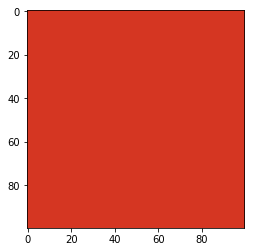

In [78]:
show_color(biggest_cluster)

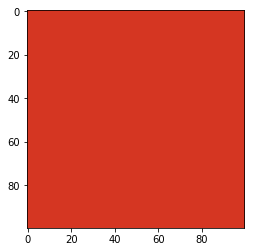

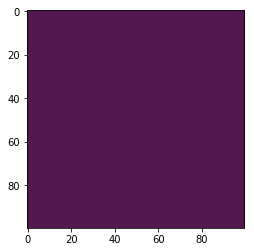

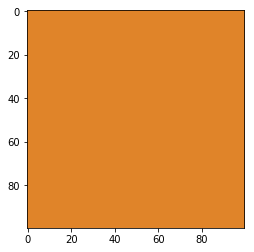

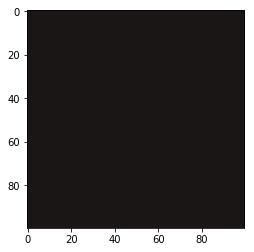

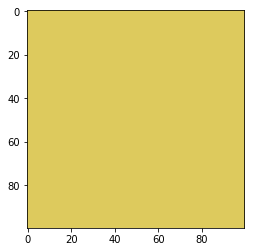

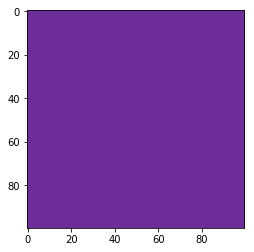

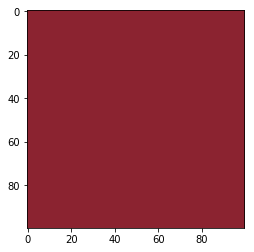

In [79]:
# until I can convert this LAB back to BFR then they might look weird
# is that the problem?? see above
for p in palette:
    p = np.float32(p.reshape(1,1,3))
    p = cv2.cvtColor(p, cv2.COLOR_LAB2BGR)
    p *= [255,255,255]
    show_color(p)

In [ ]:
#return_dominant(testfile,1)

In [ ]:
show_color(testfile, average_all_rgb(testfile))

In [ ]:
show_color(testfile, return_dominant(testfile,1))

In [ ]:
print("Most Dominant:")
a = np.ones(shape=(100,100,3), dtype=np.uint8)*np.uint8(z)
fig, (ax0) = plt.subplots(1,figsize=(2,2))
ax0.imshow(a)

In [ ]:
for p in palette:
    #p = cv2.cvtColor(p,cv2.COLOR_LUV2RGB)
    a = np.ones(shape=(100,100,3), dtype=np.uint8)*np.uint8(p)
    fig, (ax0) = plt.subplots(1,figsize=(2,2))
    ax0.imshow(a)

In [ ]:
np.unique(labels, return_counts=True)

In [ ]:
palette[np.argmax(counts)]

In [ ]:
a = np.ones(shape=(100,100,3), dtype=np.uint8)*np.uint8(z)
fig, (ax0) = plt.subplots(1,figsize=(2,2))
ax0.imshow(a)

In [ ]:
io.imshow(pic2)

In [ ]:
# loop through the img folder to make sure the images are actually there
for img in glob.glob(repo_path + img_path + '/*.*'):
    display(Image(filename=img))
    print(img)

In [ ]:
# this function returns the average
def average_all_rgb(filepath):
    img = io.imread(filepath)
    avg = img.mean(axis=(0,1))[:3]
    return avg

In [ ]:
# runs a k-means and finds the dominant colors
# n specifics which color 
# 1 = top color;  2 = 2nd top color   etc

# currently broken - returning "argmax" or #1 for now
def return_dominant(filepath, n):
    img = io.imread(filepath)
    pix = cv2.cvtColor(np.array(img).astype('float32')/255, cv2.COLOR_RGB2Luv)

    pix = np.float32(pix.reshape(-1,3))
    
    # move this from rgb to luv2
    
    n_colors = 16
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 500, 1)
    flags = cv2.KMEANS_PP_CENTERS
    
    _, labels, palette = cv2.kmeans(pix, n_colors, None, criteria, 30, flags)
    _, counts = np.unique(labels, return_counts=True)
    
    #in_order = np.argsort(-counts, axis=0)
    #return palette[in_order[n]]
    return palette[np.argmax(counts)]